In [1]:
import numpy as np
import matplotlib.pyplot as plt

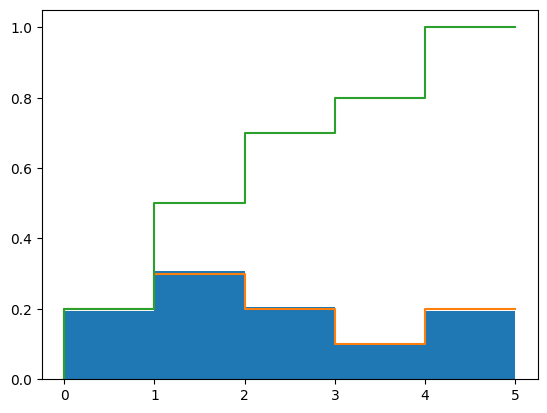

In [27]:
# ex1
def discrete_sampling(p, uni_samples):
    cdf = np.cumsum(p)
    for i in range(len(p)):
        if i==0 and uni_samples<=cdf[i]:
            dis_samples = i
        elif cdf[i-1] < uni_samples <= cdf[i]:
            dis_samples = i
    return dis_samples
    
p = np.array([0.2, 0.3, 0.2, 0.1, 0.2])
cdf = np.cumsum(p)
dis_samples = [discrete_sampling(p, np.random.uniform()) for i in range(5000)]
plt.hist(dis_samples, bins=[0, 1, 2, 3, 4, 5], density=True)
plt.step([0, 1, 2, 3, 4, 5], np.append([0], list(p)))
plt.step([0, 1, 2, 3, 4, 5], np.append([0], list(cdf)))

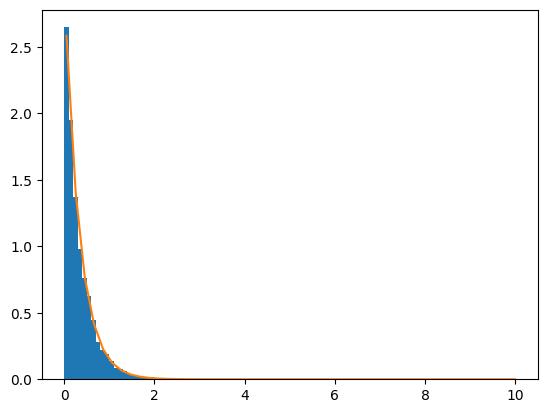

In [45]:
# ex2
mean = 3
exp_samples = - np.log(1-np.random.uniform(size=5000)) / mean
plt.hist(exp_samples, bins=100, range=(0, 10), density=True)
plt.plot(np.linspace(0.05, 10, 50), mean*np.exp(np.linspace(0.05, 10, 50)*(-mean)))

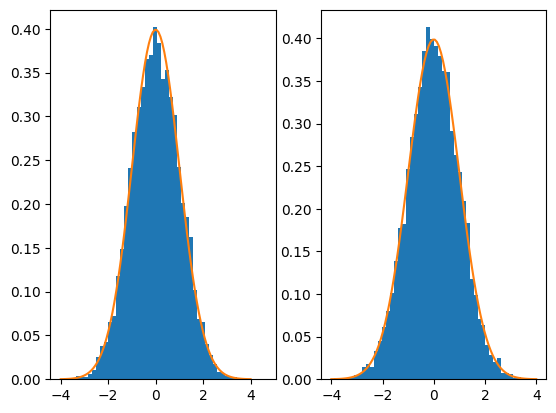

In [47]:
# ex3
A = 2*np.pi*np.random.uniform(size=10000)
R = (-2*np.log(np.random.uniform(size=10000)))**0.5
X = R*np.cos(A)
Y = R*np.sin(A)
x_range = np.linspace(-4, 4, 100)
y_range = np.exp(-0.5*x_range**2)/(np.sqrt(2*np.pi))
plt.subplot(1, 2, 1)
plt.hist(X, bins=50, density=True)
plt.plot(x_range, y_range)
plt.subplot(1, 2, 2)
plt.hist(Y, bins=50, density=True)
plt.plot(x_range, y_range)

the mean of Z is 3.0224524432868223
the variance of Z is 4.085784151248545


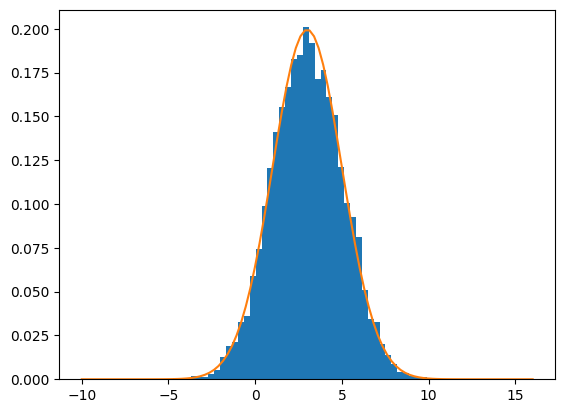

In [51]:
# ex4
mean = 3
std = 2
Z = mean + std*X
x_range = np.linspace(-10, 16, 100)
y_range = np.exp(-0.5*((x_range-mean)/std)**2)/(np.sqrt(2*np.pi)*std)
plt.hist(Z, bins=50, density=True)
plt.plot(x_range, y_range)
print('the mean of Z is', np.mean(Z))
print('the variance of Z is', np.std(Z)**2)

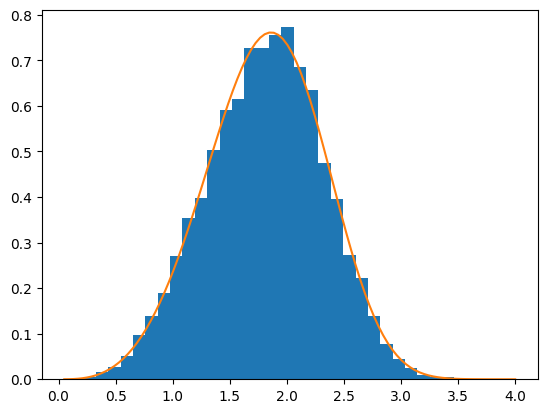

In [60]:
# ex5
alpha = 2
beta = 4
Weibull_samples = alpha*(-np.log(1-np.random.uniform(size=10000)))**(1/beta)
x_range = np.linspace(0.05, 4, 100)
y_range = beta*alpha**(-beta)*x_range**(beta-1)*np.exp(-(x_range/alpha)**beta)
plt.hist(Weibull_samples, bins=30, density=True)
plt.plot(x_range, y_range)